In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
data_train.drop(columns = "Id" ,inplace = True)
data_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
def changeNa(x):
    if(x == 'NaN'):
        return np.nan
    else:
        return x

In [5]:
data_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
def check_columns(data):
    columns = data.columns
    for column in columns:
        data[column].apply(changeNa)
        print("Column : " + str(column))
        print("Unique : " + str(data[column].unique()))
        print("Number NAN :" + str(data[column].isna().sum()))
        

In [8]:
def getCategoricalColumn(data):
    columns = []
    for column in data.columns:
        tempData = data[column].dropna()    
        random_sample = tempData.sample(1)
        if isinstance(random_sample.item(), str):
            columns.append(column)
    return columns
categoricalColumns = getCategoricalColumn(data_train)
categoricalColumns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [9]:
moreThan100Nan = []
for column in categoricalColumns:
    if data_train[column].isna().sum() <= 100:
        data_train[column].fillna(data_train[column].mode()[0], inplace=True)
    else:
        moreThan100Nan.append(column)

In [10]:
for column in moreThan100Nan:
    print("column : " +str(column)+" :"+ str(data_train[column].isna().sum()))

data_train.drop(columns  = moreThan100Nan ,inplace=True)

column : Alley :1369
column : MasVnrType :872
column : FireplaceQu :690
column : PoolQC :1453
column : Fence :1179
column : MiscFeature :1406


In [11]:
numerical_columns = data_train.select_dtypes(include=['int', 'float'])
for column in numerical_columns.columns:
    print(str(column) + " : " + str(data_train[column].isna().sum()) )
    data_train[column].fillna(data_train[column].mean(), inplace=True)

MSSubClass : 0
LotFrontage : 259
LotArea : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
MasVnrArea : 8
BsmtFinSF1 : 0
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 0
BsmtHalfBath : 0
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
TotRmsAbvGrd : 0
Fireplaces : 0
GarageYrBlt : 81
GarageCars : 0
GarageArea : 0
WoodDeckSF : 0
OpenPorchSF : 0
EnclosedPorch : 0
3SsnPorch : 0
ScreenPorch : 0
PoolArea : 0
MiscVal : 0
MoSold : 0
YrSold : 0
SalePrice : 0


In [12]:
data_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


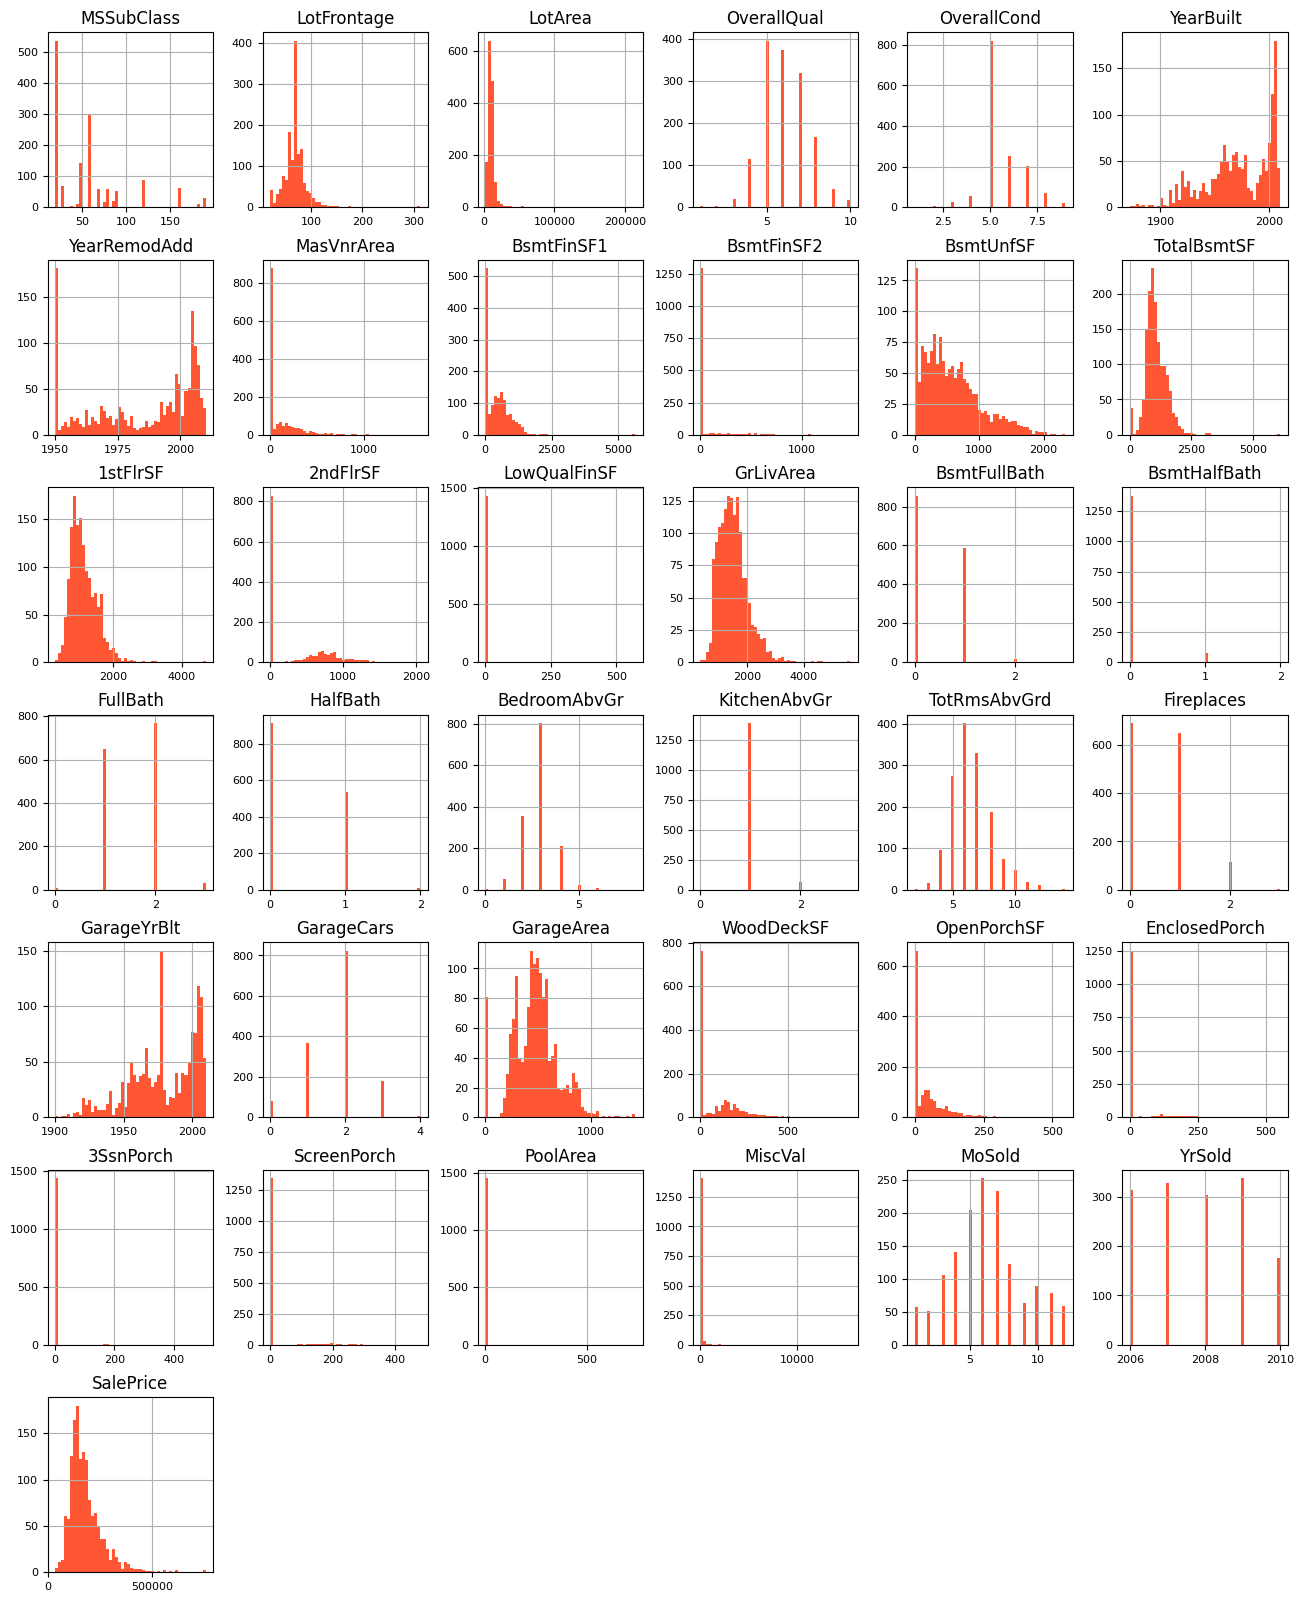

In [13]:
data_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8 ,color='#FF5733');

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


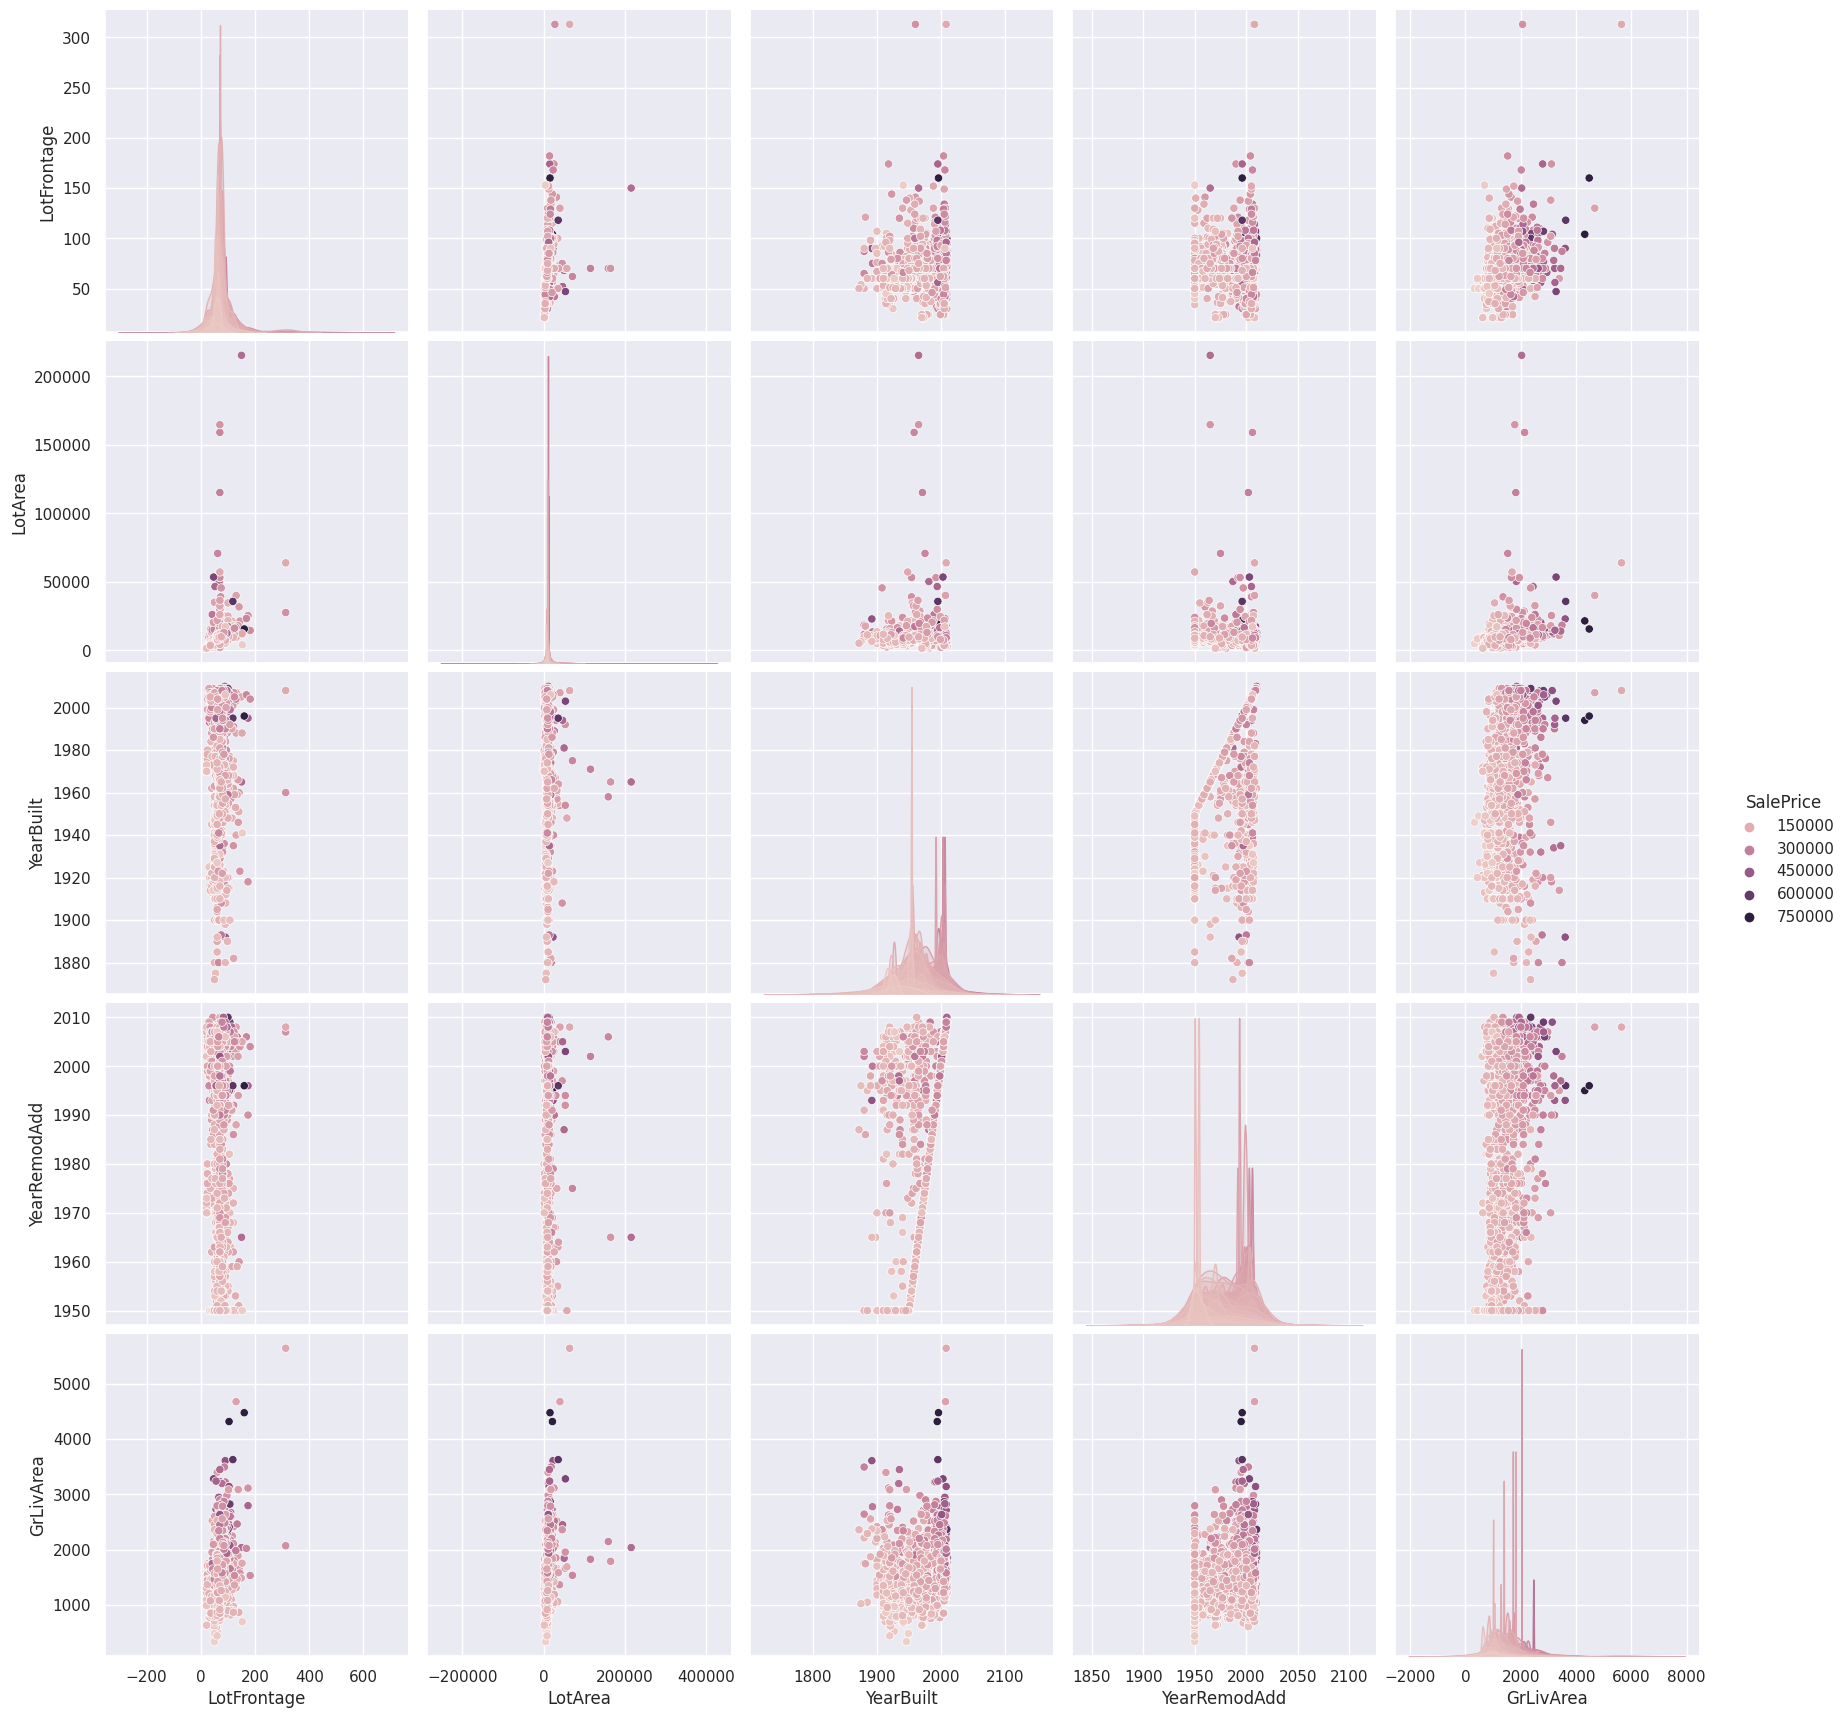

In [16]:
sns.set()
cols = ['SalePrice', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearBuilt', 'GrLivArea']

sns.pairplot(data_train[cols], size=3.5 ,hue='SalePrice')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


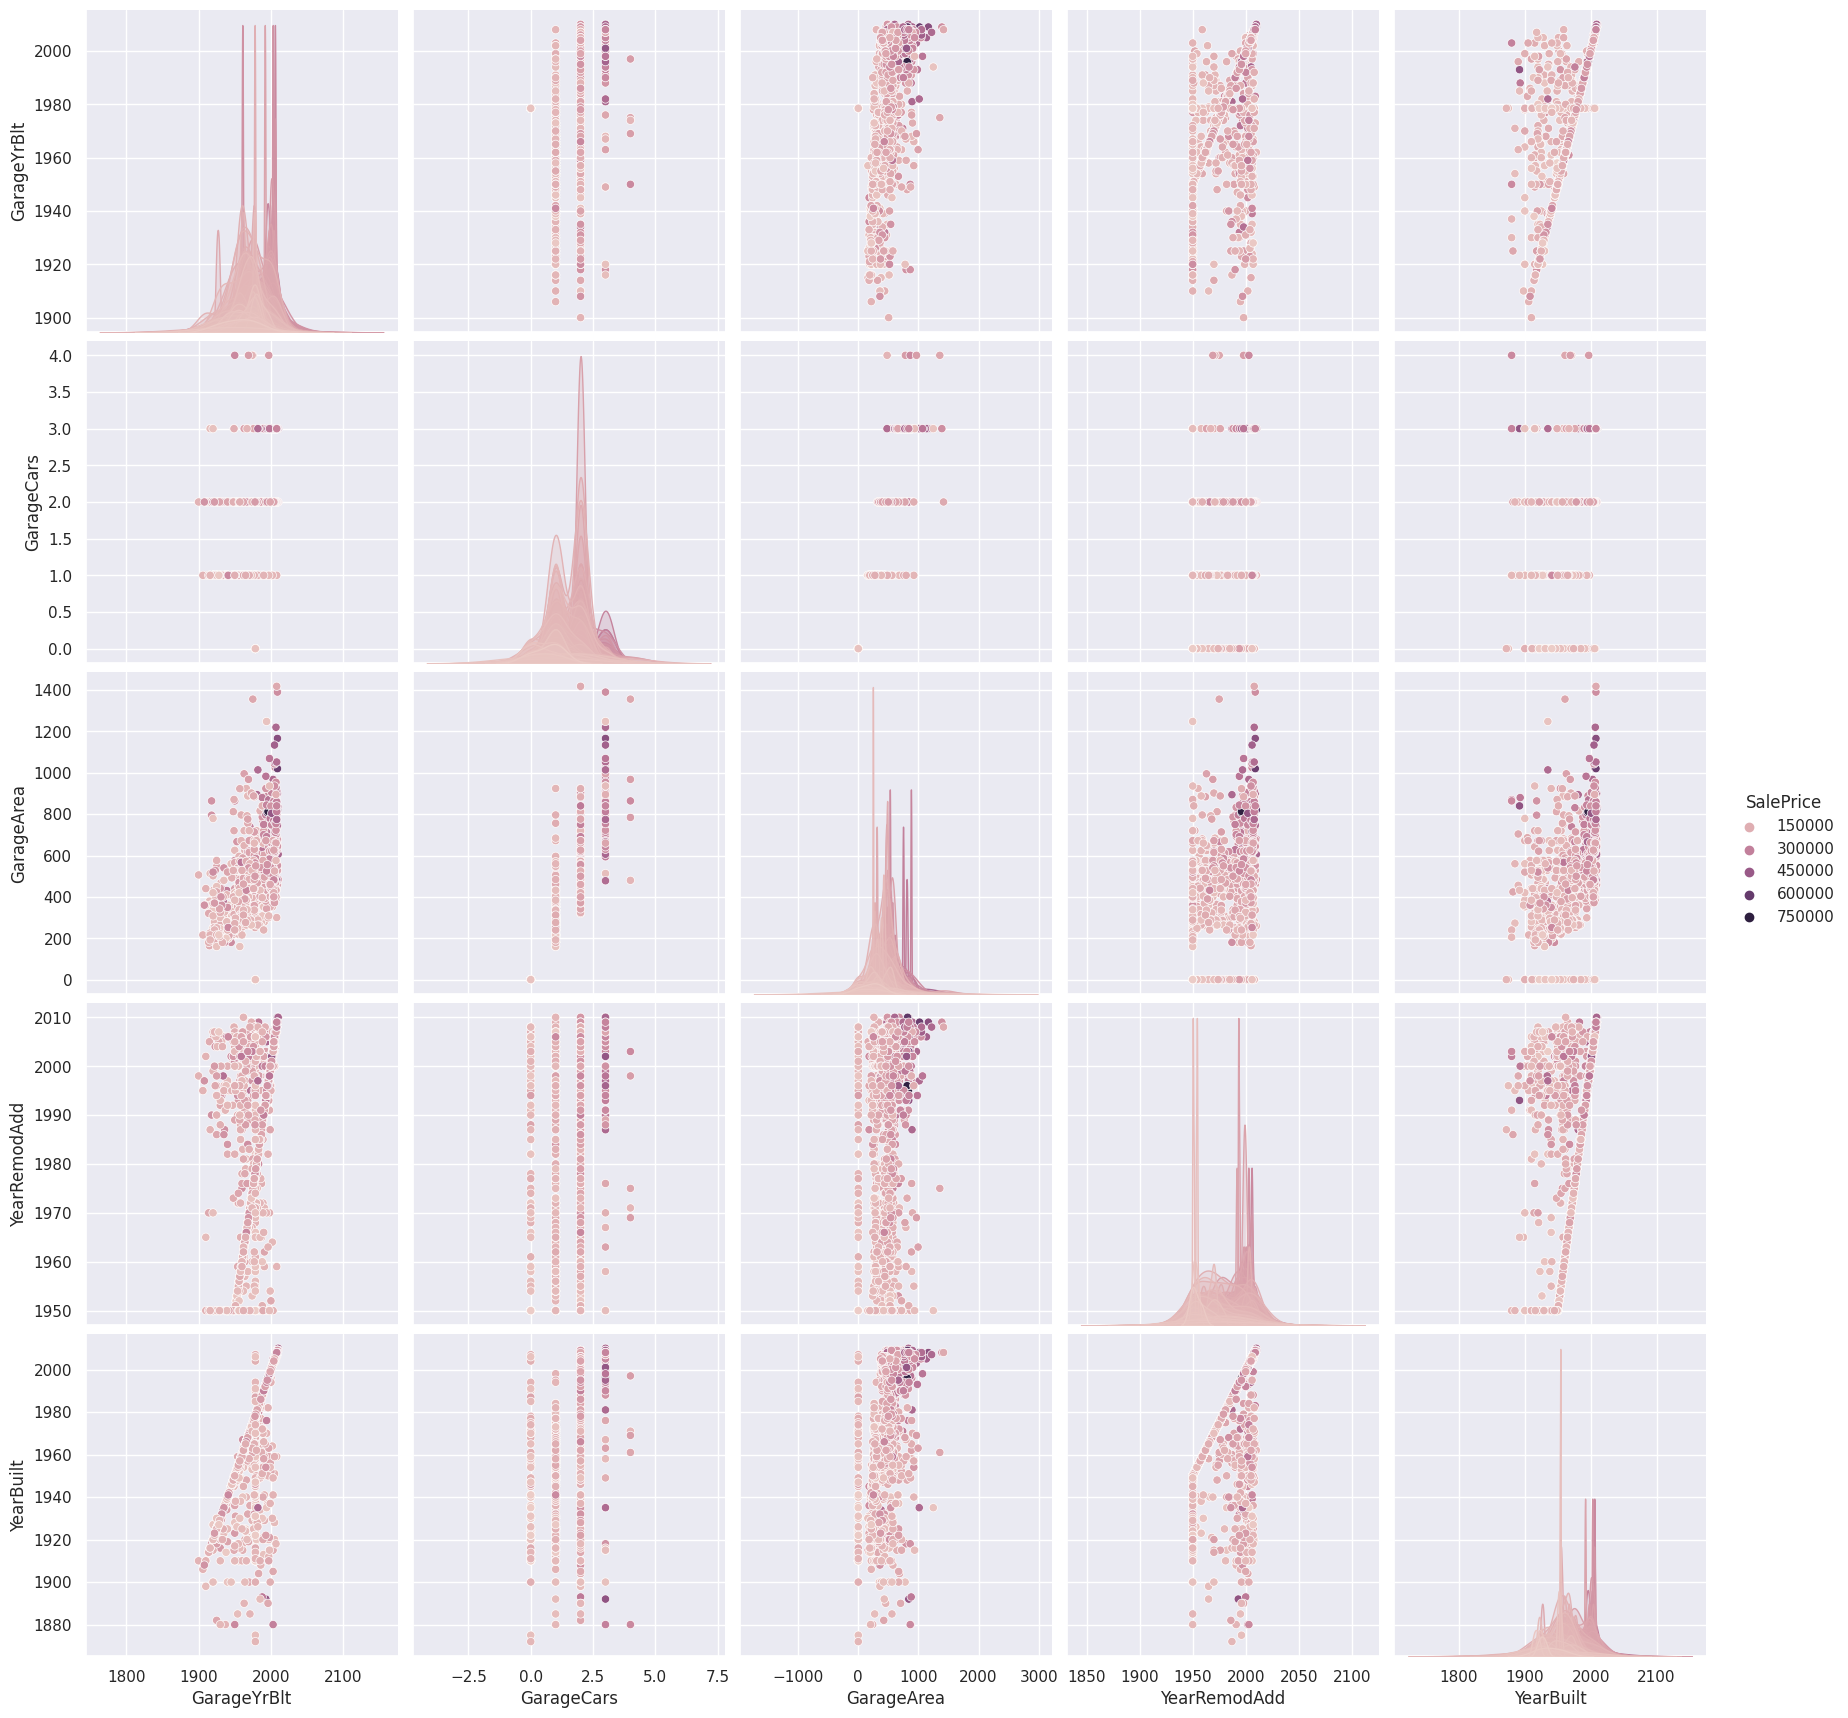

In [17]:
sns.set()

cols = ['SalePrice', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'YearRemodAdd', 'YearBuilt']

sns.pairplot(data_train[cols], size=3.5 ,hue='SalePrice')
plt.show()

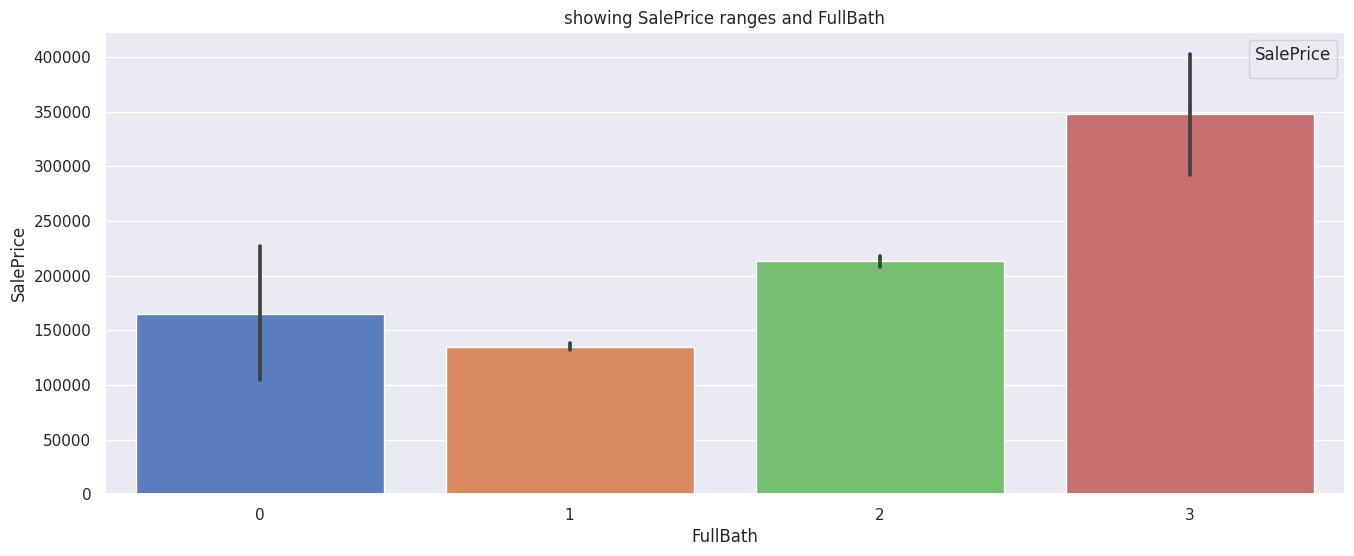

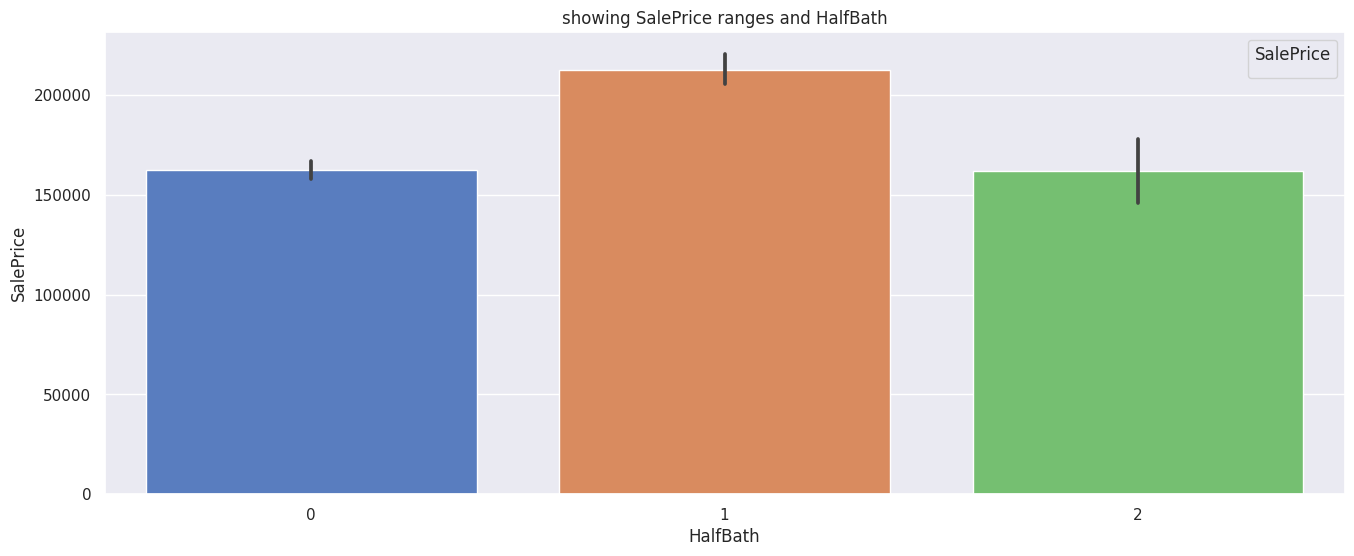

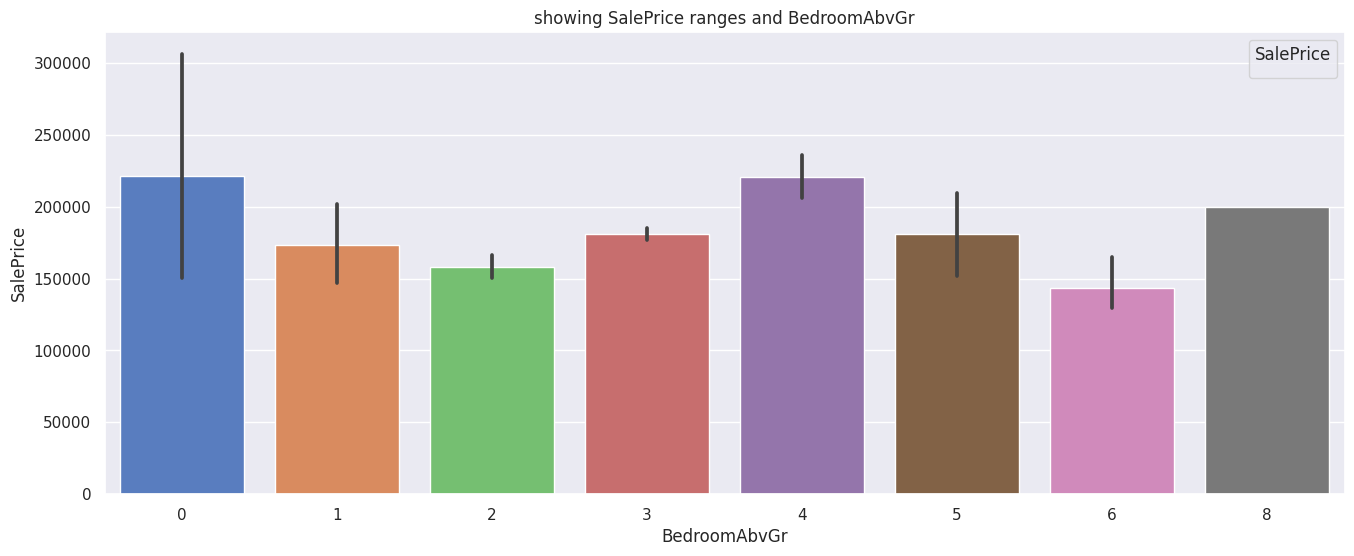

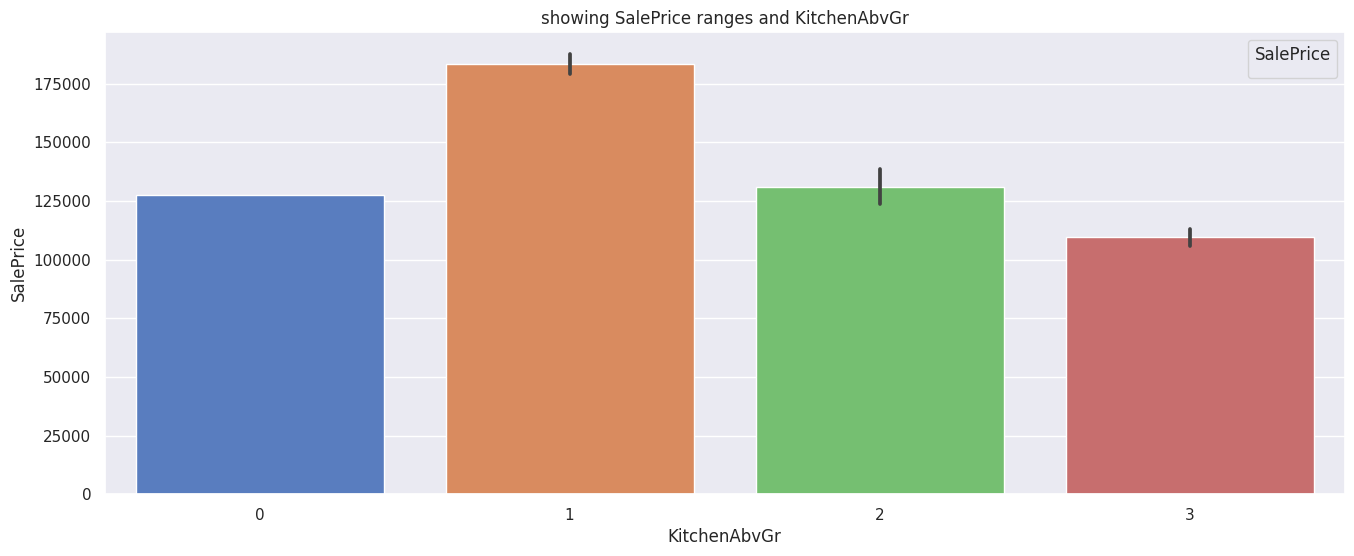

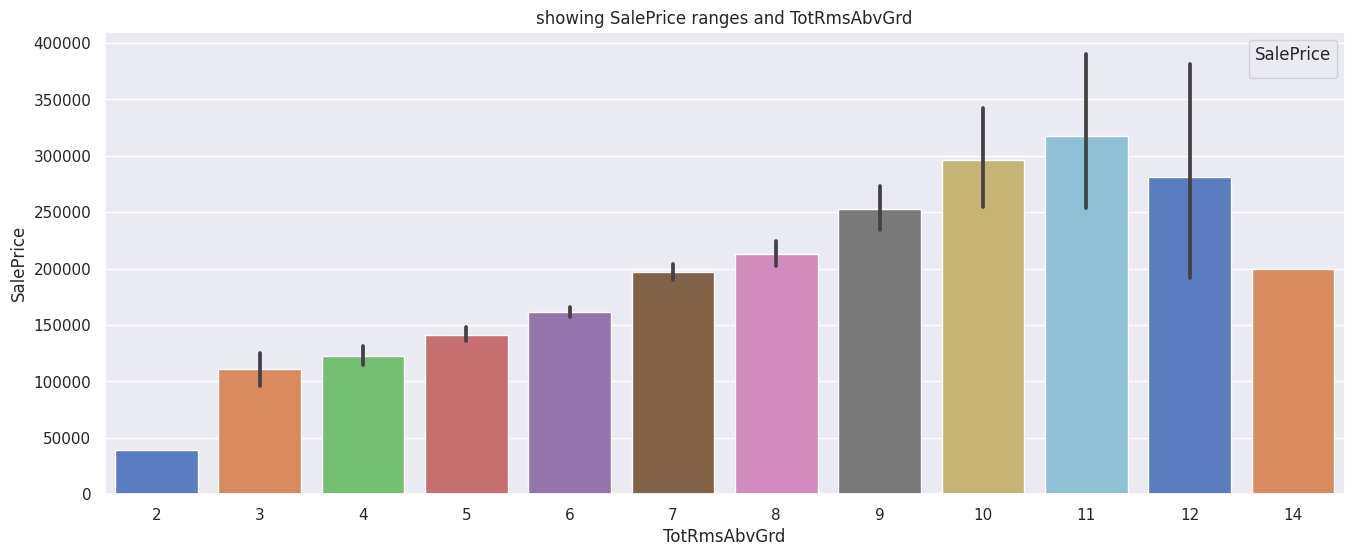

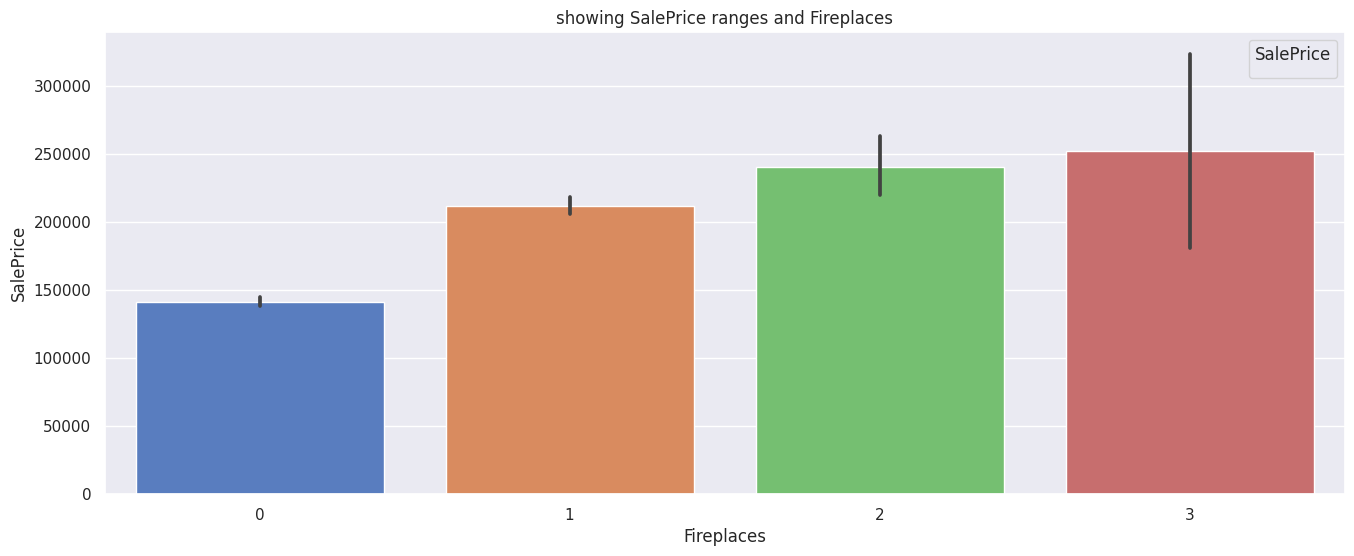

In [69]:
sns.set()
custom_palette = sns.color_palette("muted")  # Choose your desired palette


custom_palette = sns.color_palette("muted")
mylist = ['FullBath' ,'HalfBath' ,'BedroomAbvGr' ,'KitchenAbvGr' ,'TotRmsAbvGrd' ,'Fireplaces']

for item in mylist:
    plt.figure(figsize=(16, 6))
    plt.title(f'showing SalePrice ranges and {item}')
    plt.xlabel(item)
    plt.ylabel("SalePrice")
    sns.barplot(x=item, y="SalePrice", data=data_train, palette=custom_palette)
    
    #xticklabels = data_train[item].unique()
    #plt.xticks(range(len(xticklabels)), xticklabels)

    
    plt.legend(title='SalePrice')  # Add a legend for the SalePrice categories
    plt.show()

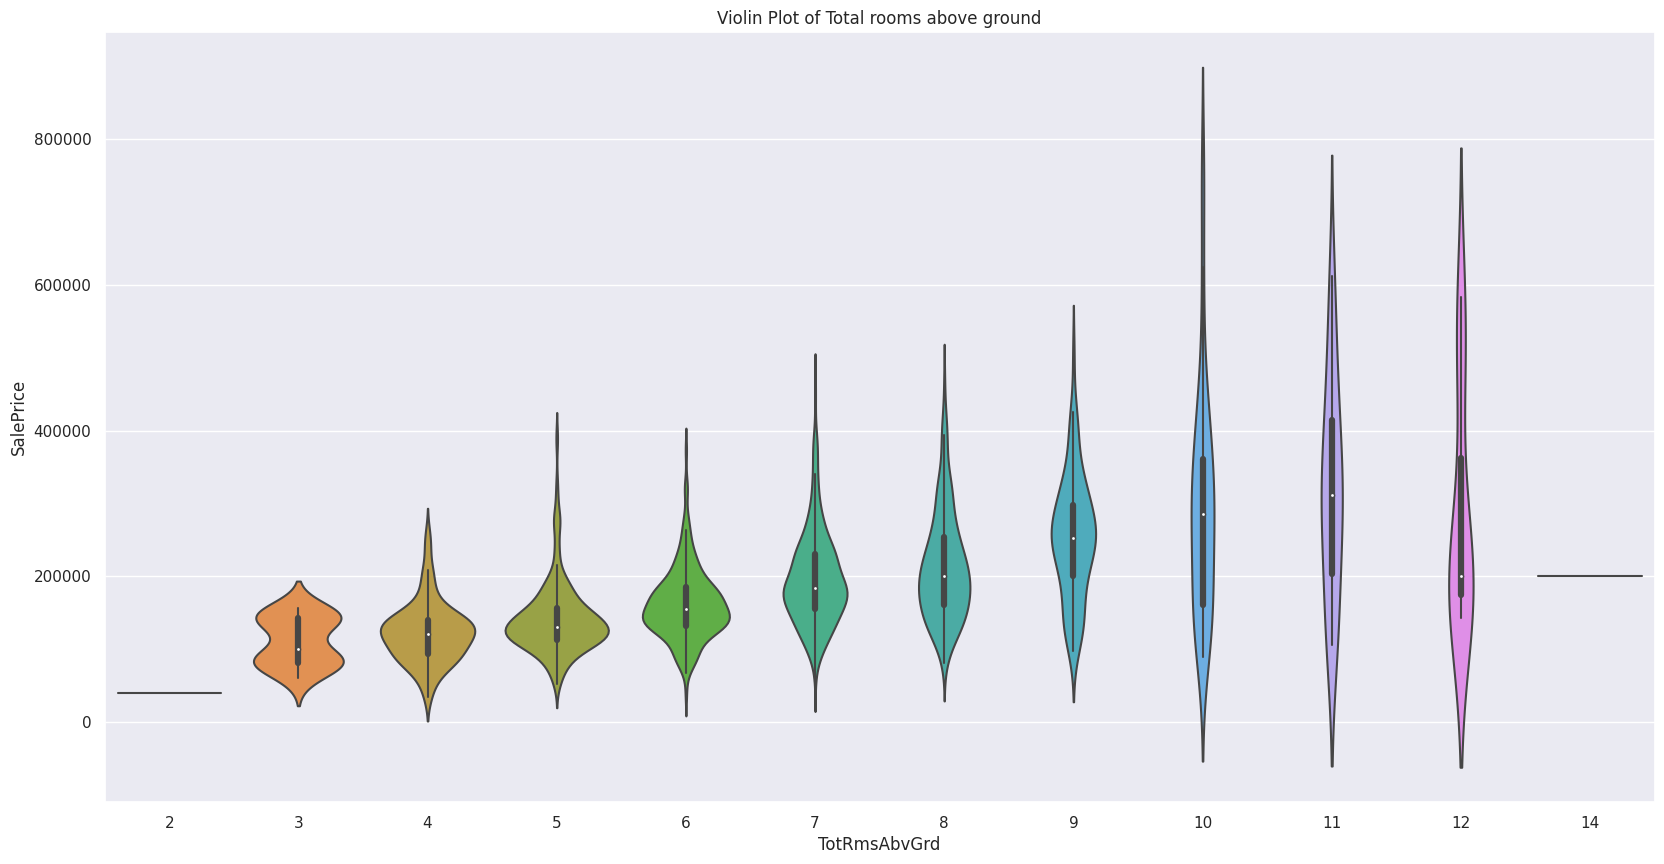

In [20]:
plt.figure(figsize=(20,10))
sns.violinplot(data=numerical_columns,x='TotRmsAbvGrd',y='SalePrice')
plt.title('Violin Plot of Total rooms above ground')
plt.show()

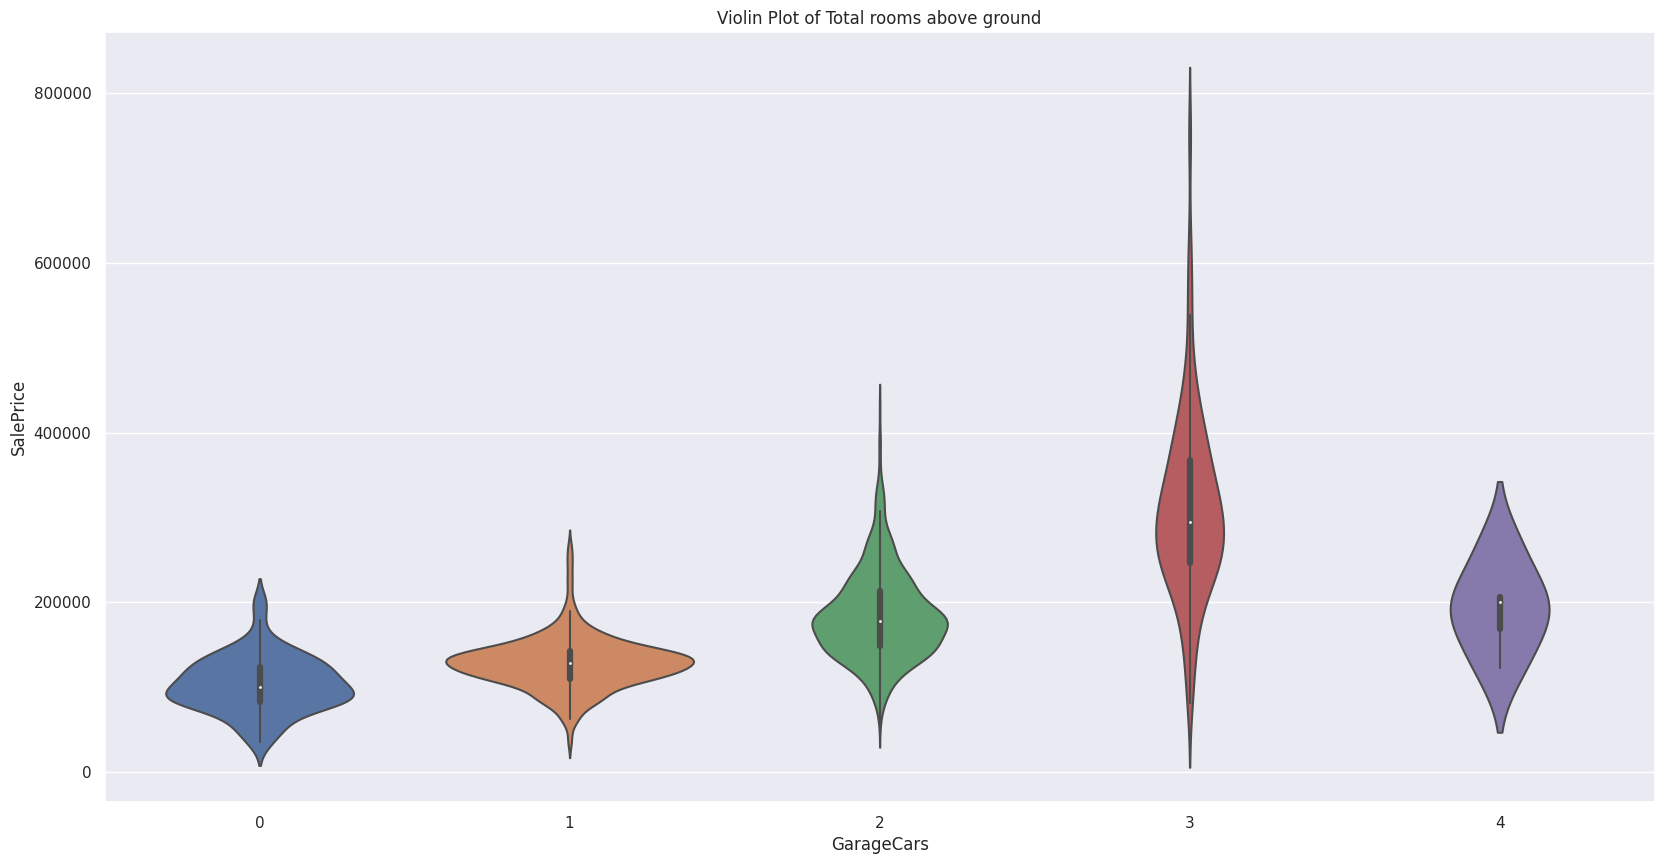

In [21]:
plt.figure(figsize=(20,10))
sns.violinplot(data=numerical_columns,x='GarageCars',y='SalePrice')
plt.title('Violin Plot of Total rooms above ground')
plt.show()

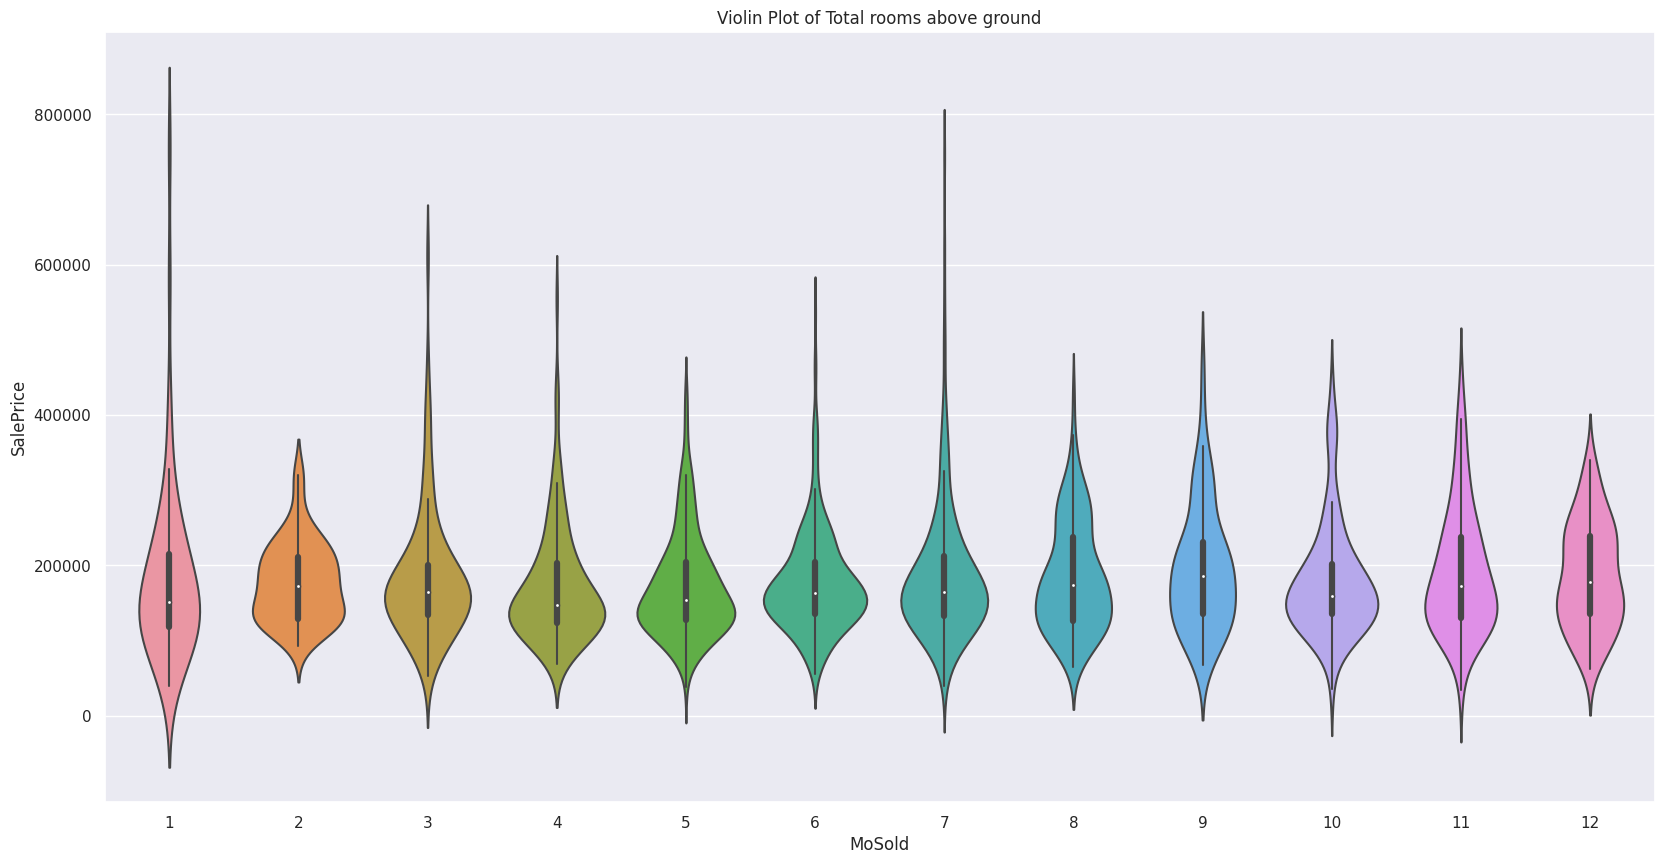

In [22]:
#MoSold: Month Sold
#rSold: Year Sold

plt.figure(figsize=(20,10))
sns.violinplot(data=numerical_columns,x='MoSold',y='SalePrice')
plt.title('Violin Plot of Total rooms above ground')
plt.show()

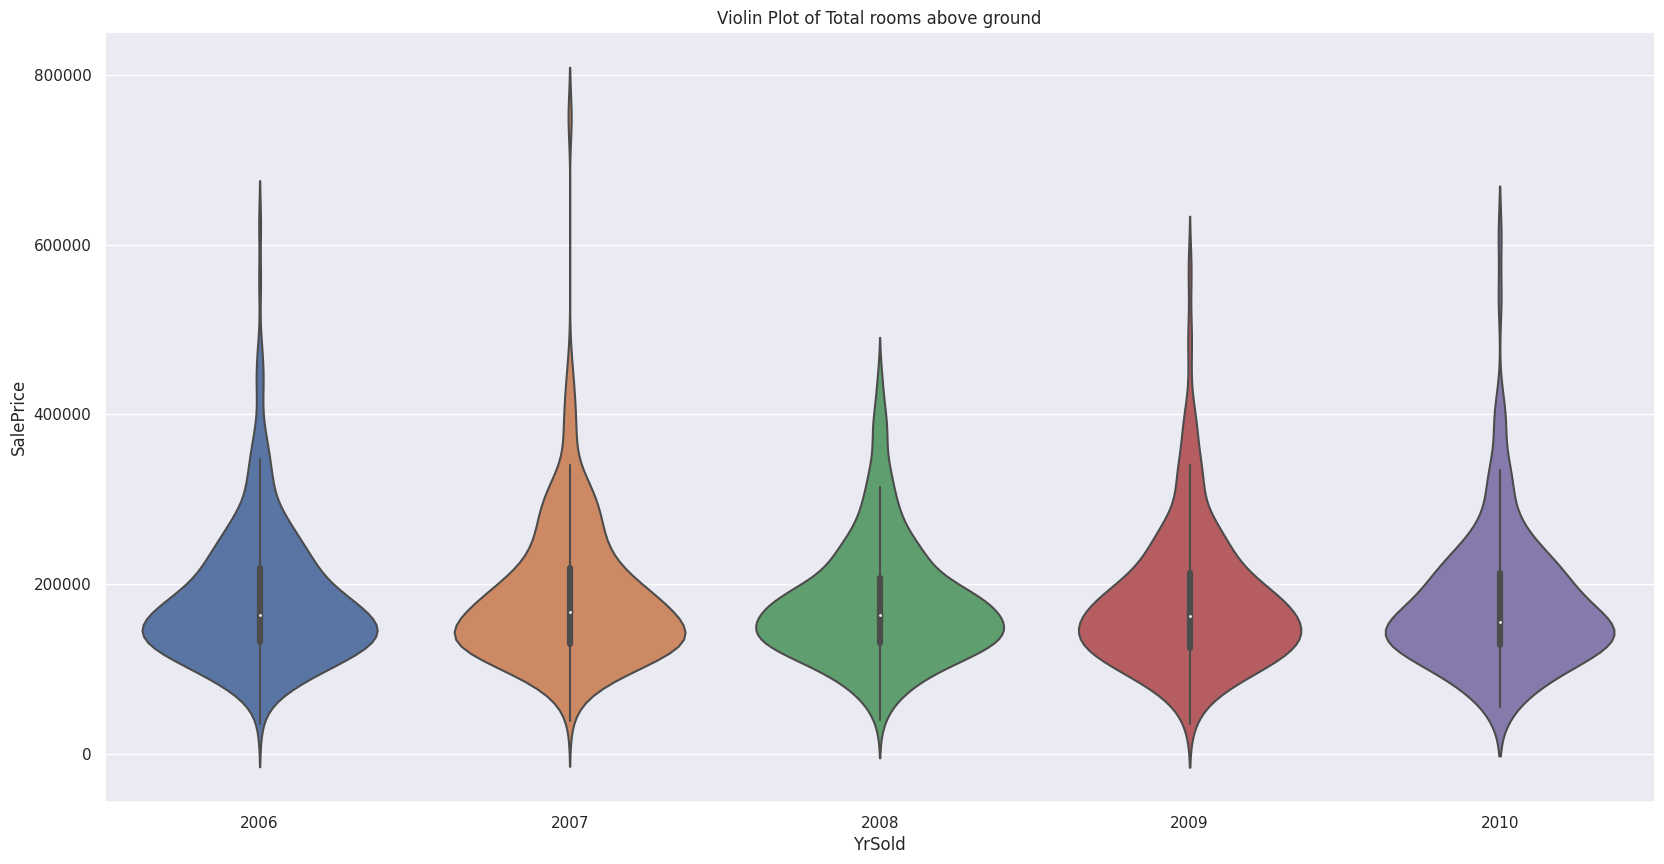

In [24]:
plt.figure(figsize=(20,10))
sns.violinplot(data=numerical_columns,x='YrSold',y='SalePrice')
plt.title('Violin Plot of Total rooms above ground')
plt.show()

In [43]:
categoricalColumns = getCategoricalColumn(data_train)
categoricalData = data_train[categoricalColumns]
categoricalData

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


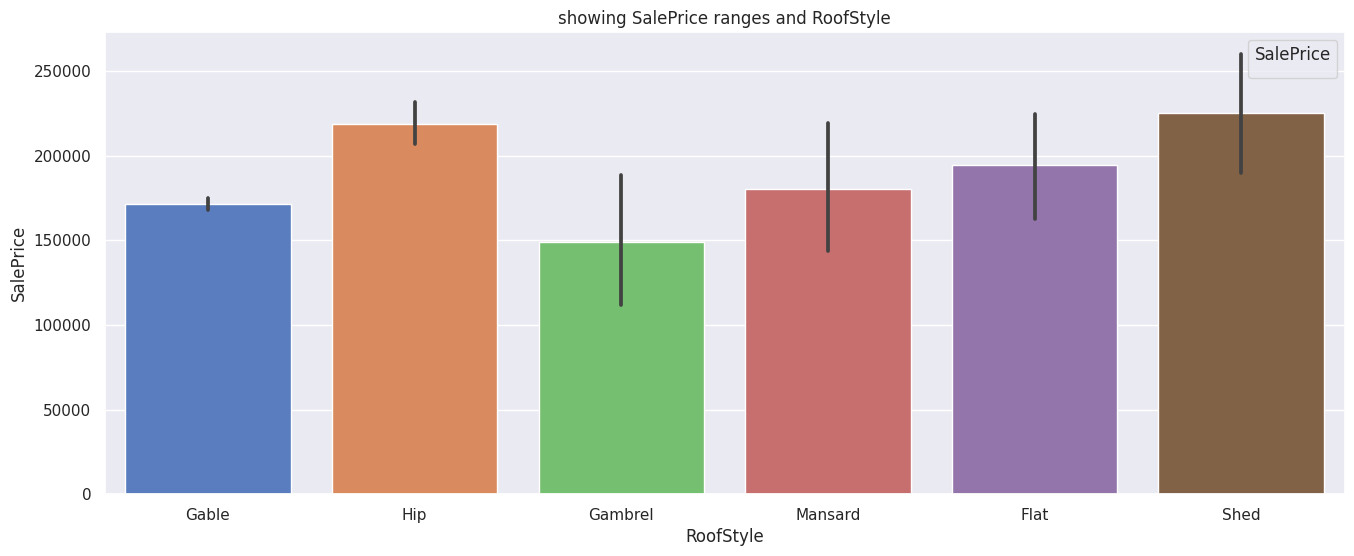

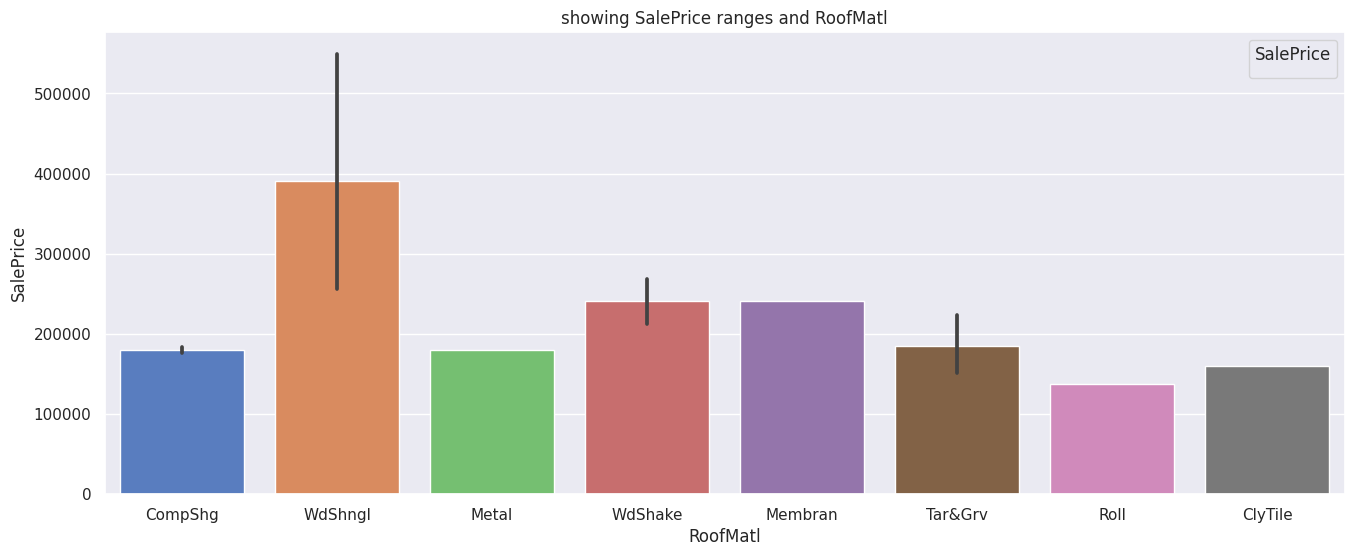

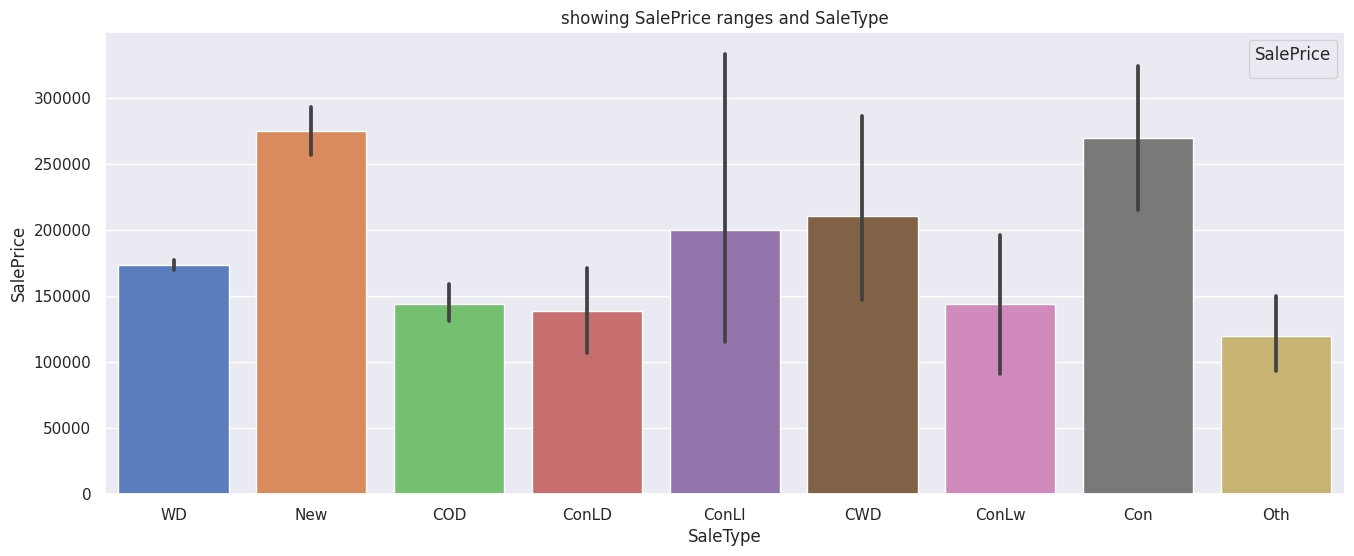

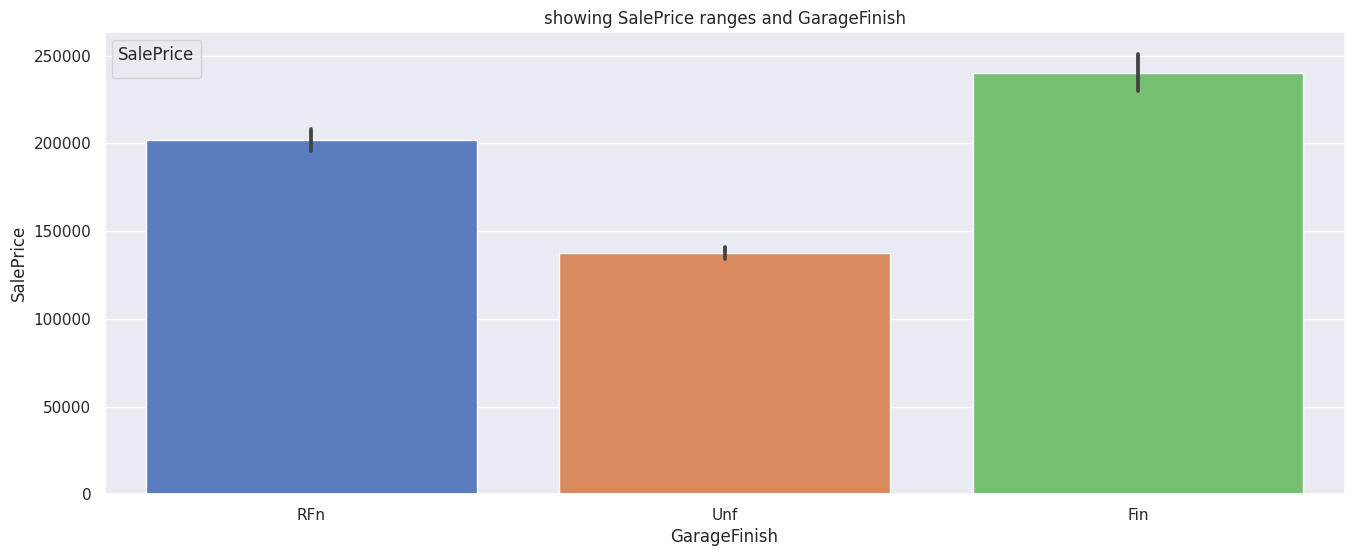

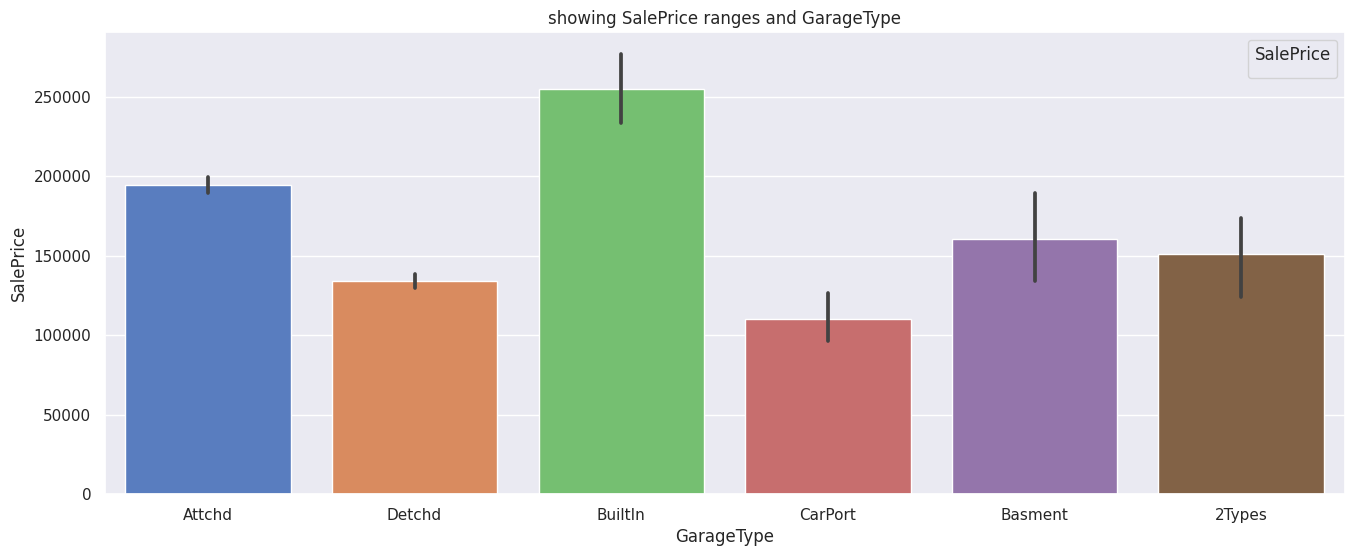

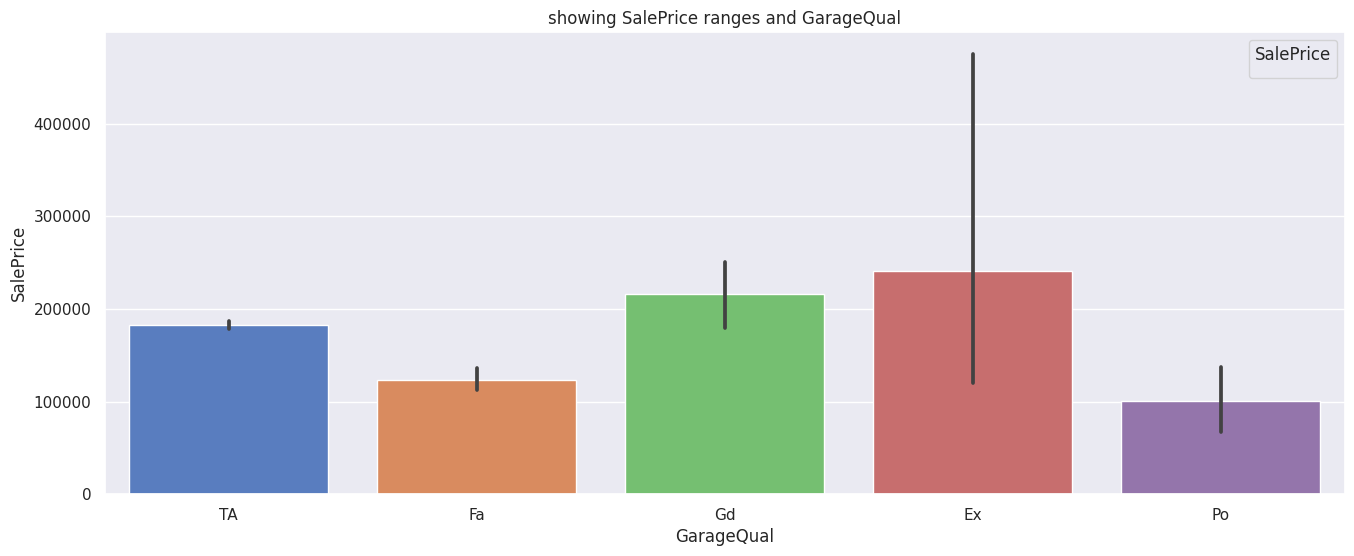

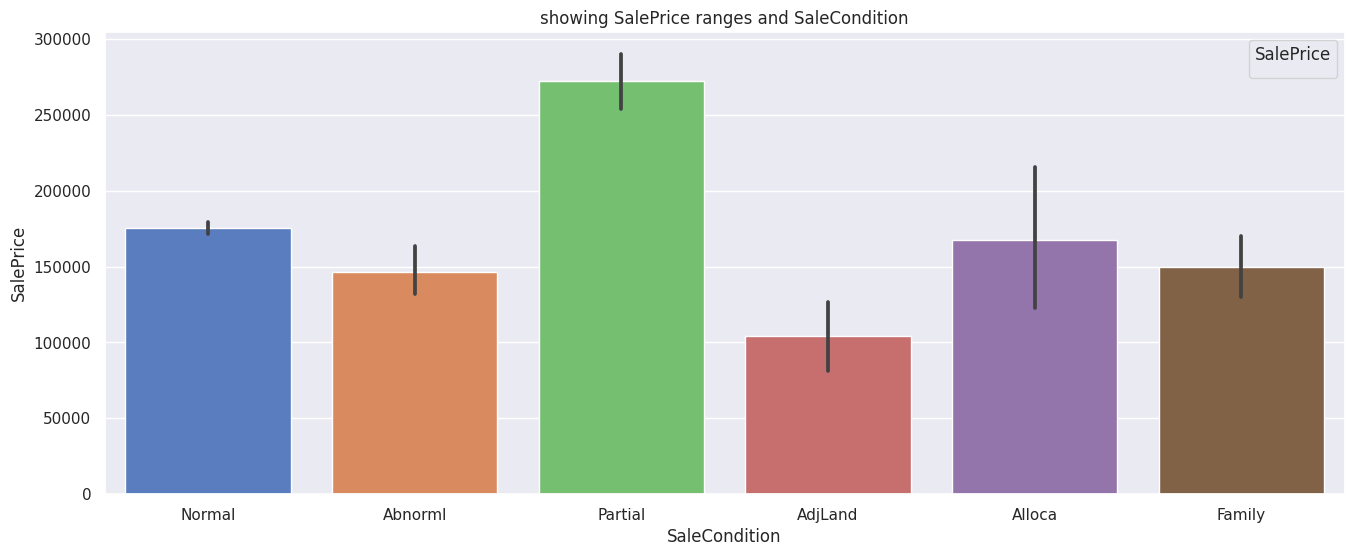

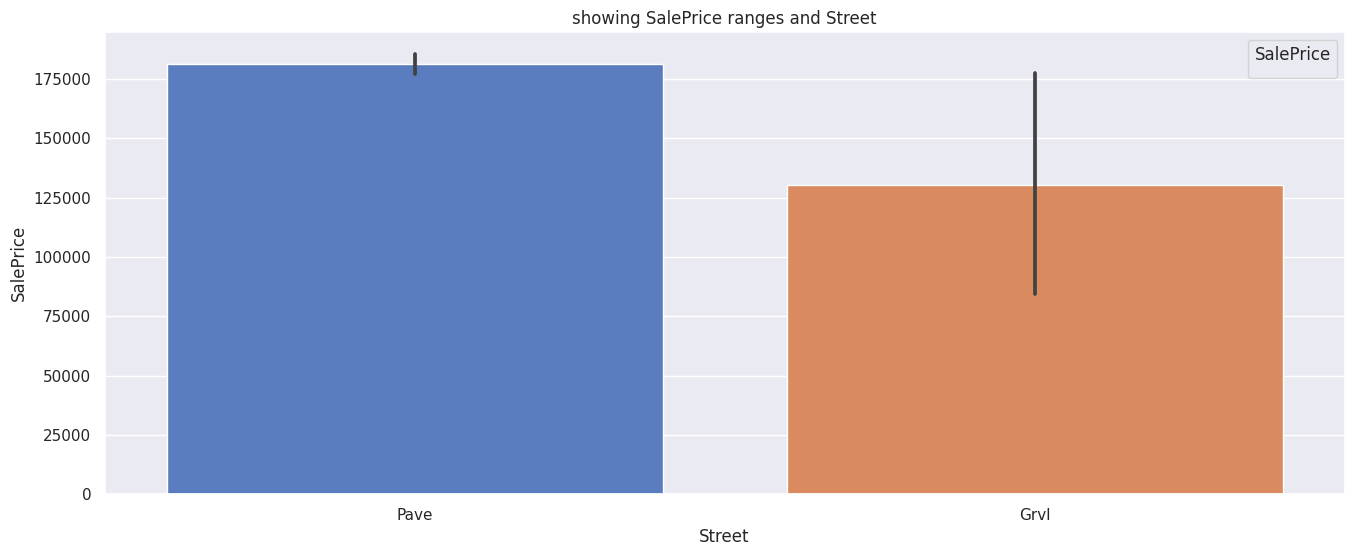

In [48]:
sns.set()
custom_palette = sns.color_palette("muted")  # Choose your desired palette

custom_palette = sns.color_palette("muted")

mylist = ['RoofStyle' ,'RoofMatl' ,'SaleType' ,'GarageFinish' ,'GarageType' ,'GarageQual' ,'SaleCondition' ,'Street']

for item in mylist:
    plt.figure(figsize=(16, 6))
    plt.title(f'showing SalePrice ranges and {item}')
    plt.xlabel(item)
    plt.ylabel("SalePrice")
    sns.barplot(x=item, y="SalePrice", data=data_train, palette=custom_palette)
    
    xticklabels = data_train[item].unique()
    plt.xticks(range(len(xticklabels)), xticklabels)

    
    plt.legend(title='SalePrice')  # Add a legend for the SalePrice categories
    plt.show()

# test 1

## Does increasing the year of manufacture increase the price?

In [54]:
from scipy.stats import pearsonr

tempData = data_train.sort_values(by='YearBuilt', ascending=True)

price = tempData['SalePrice']
year = tempData['YearBuilt']

correlation_coefficient, p_value = pearsonr(price, year)

alpha = 0.05

print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between price and year of manufacture.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between price and year of manufacture.")


Pearson Correlation Coefficient: 0.522897332879497
P-value: 2.990229099012696e-103
Reject the null hypothesis: There is a significant correlation between price and year of manufacture.


# test 2


## Does increasing the renovation date reduce the price?

In [56]:
import statsmodels.api as sm

X = data_train['YearRemodAdd']
X = sm.add_constant(X)

# Dependent variable
y = data_train['SalePrice']

# Fit a simple linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     504.7
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           3.16e-96
Time:                        11:47:52   Log-Likelihood:                -18327.
No. Observations:                1460   AIC:                         3.666e+04
Df Residuals:                    1458   BIC:                         3.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.692e+06   1.72e+05    -21.415   

# test 3

## Is the value of LotFrontage in the global average equal to 80? (or 60)

In [63]:
import scipy.stats as stats

# Sample data for LotFrontage
lot_frontage_data = data_train["LotFrontage"]

# Global population mean (replace with the specific value for the global mean)
global_mean = 80 # Replace with the global population mean

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(lot_frontage_data, global_mean)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check if the null hypothesis is rejected
if p_value < alpha:
    print(f"Reject the null hypothesis: The mean LotFrontage in your data is not equal to the global mean of {global_mean}")
else:
    print(f"Fail to reject the null hypothesis: The mean LotFrontage in your data is equal to the global mean of {global_mean}")


T-statistic: -17.26253928733087
P-value: 6.63536554942959e-61
Reject the null hypothesis: The mean LotFrontage in your data is not equal to the global mean of 80


In [67]:
import scipy.stats as stats

# Sample data for LotFrontage
lot_frontage_data = data_train["LotFrontage"]

# Global population mean (replace with the specific value for the global mean)
global_mean = 60 # Replace with the global population mean

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(lot_frontage_data, global_mean)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check if the null hypothesis is rejected
if p_value < alpha:
    print(f"Reject the null hypothesis: The mean LotFrontage in your data is not equal to the global mean of {global_mean}")
else:
    print(f"Fail to reject the null hypothesis: The mean LotFrontage in your data is equal to the global mean of {global_mean}")


T-statistic: 17.4358869621827
P-value: 5.43945206520093e-62
Reject the null hypothesis: The mean LotFrontage in your data is not equal to the global mean of 60


# test 4

## Is there a significant association between the number of parking spaces and the number of rooms in a house?

In [68]:
import scipy.stats as stats
import numpy as np

# Sample data (replace with your data)
number_of_parking_spaces = data_train["GarageCars"]
number_of_rooms = data_train["TotRmsAbvGrd"]

# Create a contingency table
contingency_table = np.array([number_of_parking_spaces, number_of_rooms])

# Perform a chi-squared test of independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Check if there is a significant association
if p < alpha:
    print("There is a significant association between the number of parking spaces and the number of rooms.")
else:
    print("There is no significant association between the number of parking spaces and the number of rooms.")


Chi-squared statistic: 359.73020478216756
P-value: 1.0
There is no significant association between the number of parking spaces and the number of rooms.


In [70]:
data_train["Street"].unique()

array(['Pave', 'Grvl'], dtype=object)

# test 5

## Does the type of street affect the price?

In [71]:
import scipy.stats as stats
import pandas as pd

# Perform a one-way ANOVA
f_statistic, p_value = stats.f_oneway(data_train[data_train["Street"] == "Pave"]["SalePrice"],
                                      data_train[data_train["Street"] == "Grvl"]["SalePrice"])

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Check if there is a significant relationship
if p_value < alpha:
    print("There is a significant relationship between StreetType and the average Price of houses.")
else:
    print("There is no significant relationship between StreetType and the average Price of houses.")


F-statistic: 2.4592895583691994
P-value: 0.11704860406782483
There is no significant relationship between StreetType and the average Price of houses.
